In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | moron
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | tairua
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | gore
Processing Record 16 of Set 1 | tessalit
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | longyearbyen

Processing Record 36 of Set 4 | nome
Processing Record 37 of Set 4 | mananara
Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | oussouye
Processing Record 40 of Set 4 | ancud
Processing Record 41 of Set 4 | kloulklubed
Processing Record 42 of Set 4 | port hedland
Processing Record 43 of Set 4 | esperance
Processing Record 44 of Set 4 | coquimbo
Processing Record 45 of Set 4 | sri aman
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | lahan
Processing Record 48 of Set 4 | takoradi
Processing Record 49 of Set 4 | bambous virieux
Processing Record 50 of Set 4 | dudinka
Processing Record 1 of Set 5 | aklavik
Processing Record 2 of Set 5 | mananjary
Processing Record 3 of Set 5 | debre zeyit
Processing Record 4 of Set 5 | kitimat
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 5 | auki
Processing Record 7 of Set 5 | bondo
Processing Record 8 of Set 5 | mogocha
Processing Record 9 of Set 5 

Processing Record 24 of Set 8 | marquette
Processing Record 25 of Set 8 | siloam springs
Processing Record 26 of Set 8 | miranda
Processing Record 27 of Set 8 | zhezkazgan
Processing Record 28 of Set 8 | japura
Processing Record 29 of Set 8 | san patricio
Processing Record 30 of Set 8 | xinqing
Processing Record 31 of Set 8 | puerto boyaca
Processing Record 32 of Set 8 | pevek
Processing Record 33 of Set 8 | conakry
Processing Record 34 of Set 8 | carauari
Processing Record 35 of Set 8 | leua
Processing Record 36 of Set 8 | mentok
City not found. Skipping...
Processing Record 37 of Set 8 | khasan
Processing Record 38 of Set 8 | cabedelo
Processing Record 39 of Set 8 | eskasem
City not found. Skipping...
Processing Record 40 of Set 8 | sabang
Processing Record 41 of Set 8 | bangui
Processing Record 42 of Set 8 | mattru
Processing Record 43 of Set 8 | mogadishu
Processing Record 44 of Set 8 | sarangani
Processing Record 45 of Set 8 | peniche
Processing Record 46 of Set 8 | severo-yenisey

Processing Record 13 of Set 12 | saint-francois
Processing Record 14 of Set 12 | bogovarovo
Processing Record 15 of Set 12 | wahran
City not found. Skipping...
Processing Record 16 of Set 12 | westpunt
City not found. Skipping...
Processing Record 17 of Set 12 | kailua
Processing Record 18 of Set 12 | soyo
Processing Record 19 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 12 | riaba
City not found. Skipping...
Processing Record 21 of Set 12 | yinchuan
Processing Record 22 of Set 12 | lotofaga
Processing Record 23 of Set 12 | ludvika
Processing Record 24 of Set 12 | grants
Processing Record 25 of Set 12 | pervomayskoye
Processing Record 26 of Set 12 | maniitsoq
Processing Record 27 of Set 12 | portland
Processing Record 28 of Set 12 | chala
Processing Record 29 of Set 12 | belaya gora
Processing Record 30 of Set 12 | esfarayen
Processing Record 31 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 32 of Set 12 | chimoio
Processing Reco

In [11]:
len(city_data)

543

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,79.03,71,100,3.40,ID,2022-02-02 05:35:23
1,Moron,-34.6534,-58.6198,74.98,74,2,5.55,AR,2022-02-02 05:35:24
2,Saldanha,-33.0117,17.9442,64.45,92,89,13.06,ZA,2022-02-02 05:34:00
3,Punta Arenas,-53.1500,-70.9167,44.71,70,75,14.97,CL,2022-02-02 05:35:24
4,Rikitea,-23.1203,-134.9692,78.30,68,95,5.10,PF,2022-02-02 05:35:25
5,Vila Franca Do Campo,37.7167,-25.4333,56.19,81,92,10.38,PT,2022-02-02 05:27:16
6,Jamestown,42.0970,-79.2353,36.72,50,40,7.00,US,2022-02-02 05:31:26
7,Tairua,-37.0167,175.8500,72.09,89,100,11.88,NZ,2022-02-02 05:35:25
8,Busselton,-33.6500,115.3333,86.04,30,25,7.67,AU,2022-02-02 05:35:26
9,Cape Town,-33.9258,18.4232,69.28,82,75,17.27,ZA,2022-02-02 05:35:03


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2022-02-02 05:35:23,-3.8004,102.2655,79.03,71,100,3.40
1,Moron,AR,2022-02-02 05:35:24,-34.6534,-58.6198,74.98,74,2,5.55
2,Saldanha,ZA,2022-02-02 05:34:00,-33.0117,17.9442,64.45,92,89,13.06
3,Punta Arenas,CL,2022-02-02 05:35:24,-53.1500,-70.9167,44.71,70,75,14.97
4,Rikitea,PF,2022-02-02 05:35:25,-23.1203,-134.9692,78.30,68,95,5.10
5,Vila Franca Do Campo,PT,2022-02-02 05:27:16,37.7167,-25.4333,56.19,81,92,10.38
6,Jamestown,US,2022-02-02 05:31:26,42.0970,-79.2353,36.72,50,40,7.00
7,Tairua,NZ,2022-02-02 05:35:25,-37.0167,175.8500,72.09,89,100,11.88
8,Busselton,AU,2022-02-02 05:35:26,-33.6500,115.3333,86.04,30,25,7.67
9,Cape Town,ZA,2022-02-02 05:35:03,-33.9258,18.4232,69.28,82,75,17.27


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


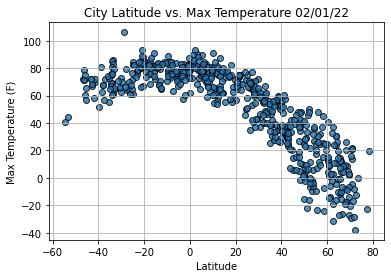

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

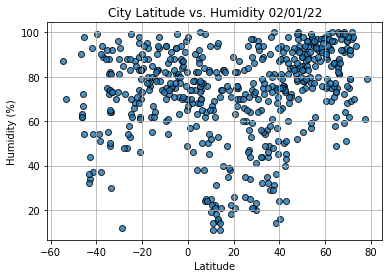

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

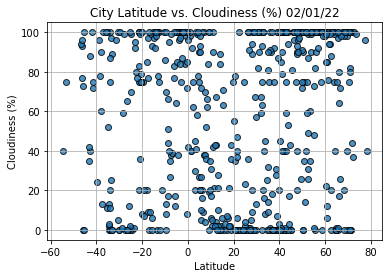

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

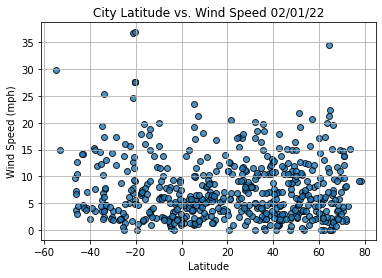

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                     Tessalit
Country                        ML
Date          2022-02-02 05:35:28
Lat                       20.1986
Lng                        1.0114
Max Temp                    56.61
Humidity                       26
Cloudiness                     55
Wind Speed                  10.92
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
538     True
539     True
540     True
541    False
542     True
Name: Lat, Length: 543, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Vila Franca Do Campo,PT,2022-02-02 05:27:16,37.7167,-25.4333,56.19,81,92,10.38
6,Jamestown,US,2022-02-02 05:31:26,42.0970,-79.2353,36.72,50,40,7.00
10,Provideniya,RU,2022-02-02 05:35:27,64.3833,-173.3000,10.98,58,0,21.23
13,Tessalit,ML,2022-02-02 05:35:28,20.1986,1.0114,56.61,26,55,10.92
15,Longyearbyen,SJ,2022-02-02 05:35:29,78.2186,15.6401,19.24,79,40,9.22


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

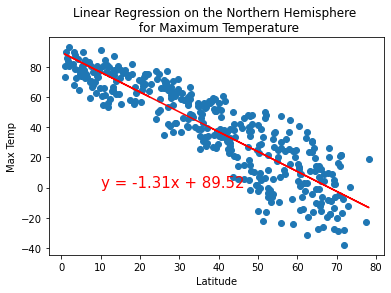

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

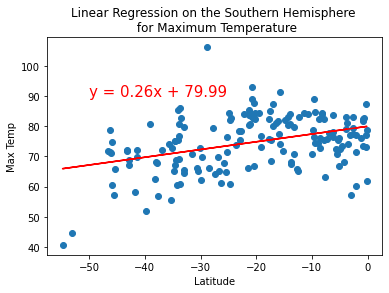

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

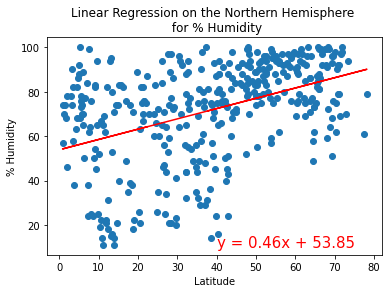

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


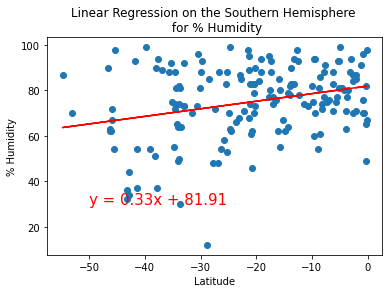

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

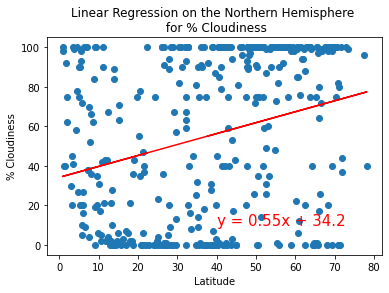

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))


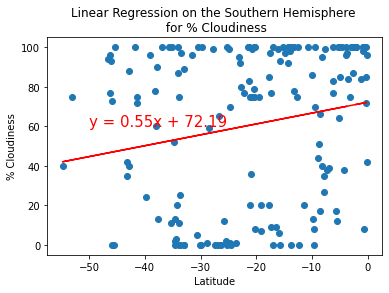

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


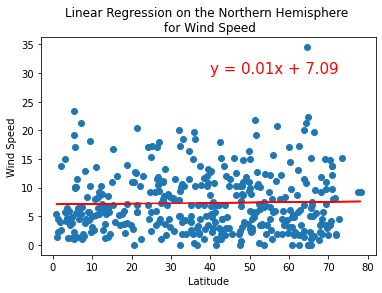

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

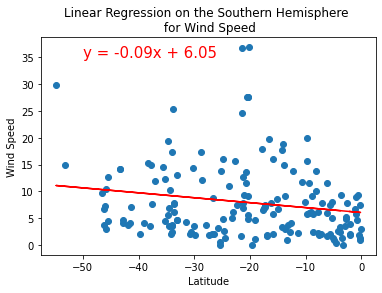

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))